## Train and explain a classifer

Note that this is a small sample of the whole data for demonstration purpose.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Ziqi-Li/geoshapley/refs/heads/main/data/seattle_sample_1k.csv")
data

,Unnamed: 0,bathrooms,sqft_living,sqft_lot,grade,condition,waterfront,view,age,UTM_X,UTM_Y,log_price
0,0,3.00,2660,4600,8,3,0,0,109,552217.557035,5.274945e+06,6.091315
1,1,2.25,2530,8736,7,4,0,0,57,565692.484331,5.272758e+06,5.790988
2,2,2.00,1390,13464,7,4,0,0,28,562451.661509,5.245291e+06,5.315130
3,3,1.00,940,4264,7,5,0,0,66,546816.935618,5.264407e+06,5.619093
4,4,2.25,2070,7225,8,3,0,0,36,564343.195352,5.244978e+06,5.477121
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.00,790,13170,6,3,0,0,68,548381.646974,5.266342e+06,5.447158
996,996,2.50,2000,5390,7,3,0,0,12,565755.572522,5.247006e+06,5.453318
997,997,1.75,2160,5760,8,4,0,0,61,545835.661307,5.264755e+06,5.826075
998,998,3.00,1950,1983,9,3,0,0,6,559976.813626,5.273019e+06,5.894870


In [5]:
data = gpd.GeoDataFrame(
    data, crs="EPSG:32610", geometry=gpd.points_from_xy(x=data.UTM_X, y=data.UTM_Y))
data

,Unnamed: 0,bathrooms,sqft_living,sqft_lot,grade,condition,waterfront,view,age,UTM_X,UTM_Y,log_price,geometry
0,0,3.00,2660,4600,8,3,0,0,109,552217.557035,5.274945e+06,6.091315,POINT (552217.557 5274944.781)
1,1,2.25,2530,8736,7,4,0,0,57,565692.484331,5.272758e+06,5.790988,POINT (565692.484 5272758.059)
2,2,2.00,1390,13464,7,4,0,0,28,562451.661509,5.245291e+06,5.315130,POINT (562451.662 5245291.268)
3,3,1.00,940,4264,7,5,0,0,66,546816.935618,5.264407e+06,5.619093,POINT (546816.936 5264406.872)
4,4,2.25,2070,7225,8,3,0,0,36,564343.195352,5.244978e+06,5.477121,POINT (564343.195 5244978.22)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.00,790,13170,6,3,0,0,68,548381.646974,5.266342e+06,5.447158,POINT (548381.647 5266342.401)
996,996,2.50,2000,5390,7,3,0,0,12,565755.572522,5.247006e+06,5.453318,POINT (565755.573 5247005.588)
997,997,1.75,2160,5760,8,4,0,0,61,545835.661307,5.264755e+06,5.826075,POINT (545835.661 5264754.754)
998,998,3.00,1950,1983,9,3,0,0,6,559976.813626,5.273019e+06,5.894870,POINT (559976.814 5273018.798)


In [6]:
data["price_above_0_5M"] = 10**data.log_price >= (10**5)*5

In [7]:
data["price_above_0_5M"].value_counts()

price_above_0_5M
False    623
True     377
Name: count, dtype: int64

In [8]:
y = data.price_above_0_5M

X_coords = data[['bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition',
                 'waterfront', 'view', 'age','UTM_X', 'UTM_Y']]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_coords, y, random_state=1)

## Model training by AutoML

In [10]:
from flaml import AutoML

settings = {
    "time_budget": 20,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics for classification
    "estimator_list": 'auto',  # list of ML learners; 'auto' means try all
    "task": 'classification',  # task type, can also be regression   
    "eval_method": 'cv', #enable cross-validation
    "n_splits": 5, #5-fold cross validation
    "verbose": 3
}

automl = AutoML()
automl.fit(X_train, y_train,  **settings)

[flaml.automl.logger: 12-23 20:23:40] {1752} INFO - task = classification
[flaml.automl.logger: 12-23 20:23:40] {1763} INFO - Evaluation method: cv
[flaml.automl.logger: 12-23 20:23:40] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 12-23 20:23:40] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 12-23 20:23:40] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 12-23 20:23:40] {2417} INFO - Estimated sufficient time budget=1530s. Estimated necessary time budget=35s.
[flaml.automl.logger: 12-23 20:23:40] {2466} INFO -  at 0.3s,	estimator lgbm's best error=0.2173,	best estimator lgbm's best error=0.2173
[flaml.automl.logger: 12-23 20:23:40] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 12-23 20:23:40] {2466} INFO -  at 0.4s,	estimator lgbm's best error=0.2173,	best estimator lgbm's best error=0.2173
[flaml.automl.logger: 12-23

In [11]:
auto_pred = automl.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, auto_pred)

0.868

In [12]:
automl.model.estimator

,boosting_type,'gbdt'
,num_leaves,10
,max_depth,-1
,learning_rate,np.float64(0....4994995743033)
,n_estimators,13
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,5


In [13]:
from geoshapley import GeoShapleyExplainer

In [14]:
import shap

#It is suggested to use a small representative samples as background, 
#for small dataset, you can use all the data.

#This can be randomly chosen, or as shown here, using k-means

background_X = shap.kmeans(X_coords,k=10).data

### Important: Define a wrapper prediction function for getting predicted probabaility

In [15]:
def predict_fn_proba(X):
    return automl.predict_proba(X)[:,1]

In [16]:
%%time
automl_explainer = GeoShapleyExplainer(predict_fn_proba, background_X)

rslt = automl_explainer.explain(X_coords, n_jobs=-1)

e:\geoshapley\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: total: 34.9 s
Wall time: 33.5 s


In [17]:
rslt.check_additivity()

Components add up to model prediction:  True


### Geoshapley values now refer to probability of True (house price > =0.5 Million)

(-0.4, 0.4)

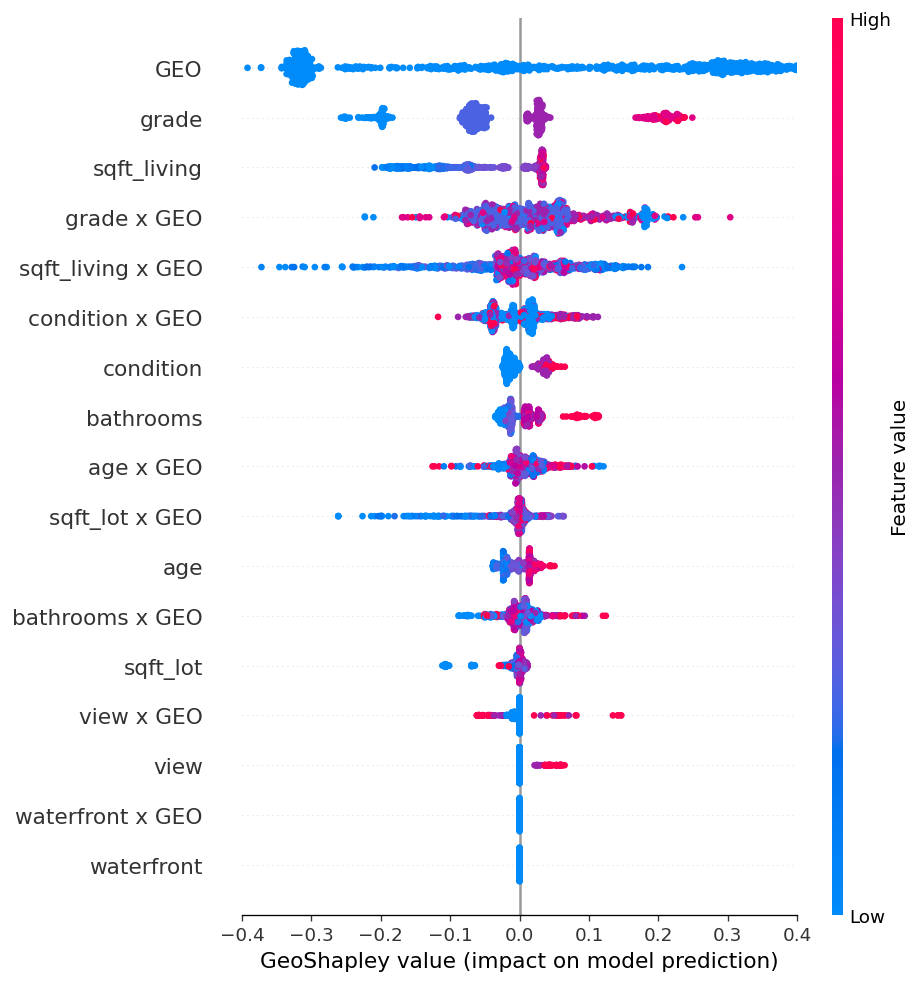

In [18]:
rslt.summary_plot(dpi=120)
plt.xlim(-0.4,0.4)# changing the x limit of the values

In [19]:
rslt.summary_statistics()

,min,25%,50%,75%,max,mean,std,abs. mean
GEO,-4.786143e-01,-3.049524e-01,5.303256e-02,2.900722e-01,5.602311e-01,3.549357e-02,2.697130e-01,2.435239e-01
grade,-2.572306e-01,-7.034304e-02,-5.427275e-02,2.876163e-02,2.489424e-01,-1.548087e-02,1.174381e-01,9.386774e-02
sqft_living,-2.088148e-01,-1.158507e-01,-2.643069e-02,3.119027e-02,3.799581e-02,-4.596434e-02,7.805065e-02,7.269875e-02
grade x GEO,-2.229395e-01,-2.979564e-02,1.822058e-02,5.923135e-02,3.035515e-01,2.369831e-02,7.359818e-02,5.861643e-02
sqft_living x GEO,-3.718492e-01,-3.113457e-02,-5.851339e-03,3.529500e-02,2.340985e-01,-4.923360e-03,7.821835e-02,5.480576e-02
condition x GEO,-1.173944e-01,-3.659015e-02,1.392960e-03,1.879080e-02,1.128991e-01,-1.365861e-03,3.729495e-02,3.084426e-02
condition,-2.488431e-02,-1.746779e-02,-7.554723e-03,3.612010e-02,6.522719e-02,5.068666e-03,2.617298e-02,2.343643e-02
bathrooms,-3.494489e-02,-1.662837e-02,-1.086754e-02,1.364789e-02,1.140920e-01,2.117784e-03,2.926324e-02,2.182478e-02
age x GEO,-1.254075e-01,-6.103078e-03,4.761454e-03,2.058829e-02,1.209854e-01,7.118018e-03,2.750775e-02,1.983897e-02
sqft_lot x GEO,-2.611959e-01,-7.547972e-03,-2.257118e-08,3.298230e-03,6.356113e-02,-9.924433e-03,3.873179e-02,1.763526e-02


In [20]:
rslt.check_additivity()

Components add up to model prediction:  True


### Location invariant primary effects

  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02
 40% (4 of 10) |##########               | Elapsed Time: 0:00:00 ETA:   0:00:00
 80% (8 of 10) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 50% (5 of 10) |############             | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (9 of 10) |######################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 50% (5 of 10) |############             | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (9 of 10) |######################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (10 of 10) |#######################

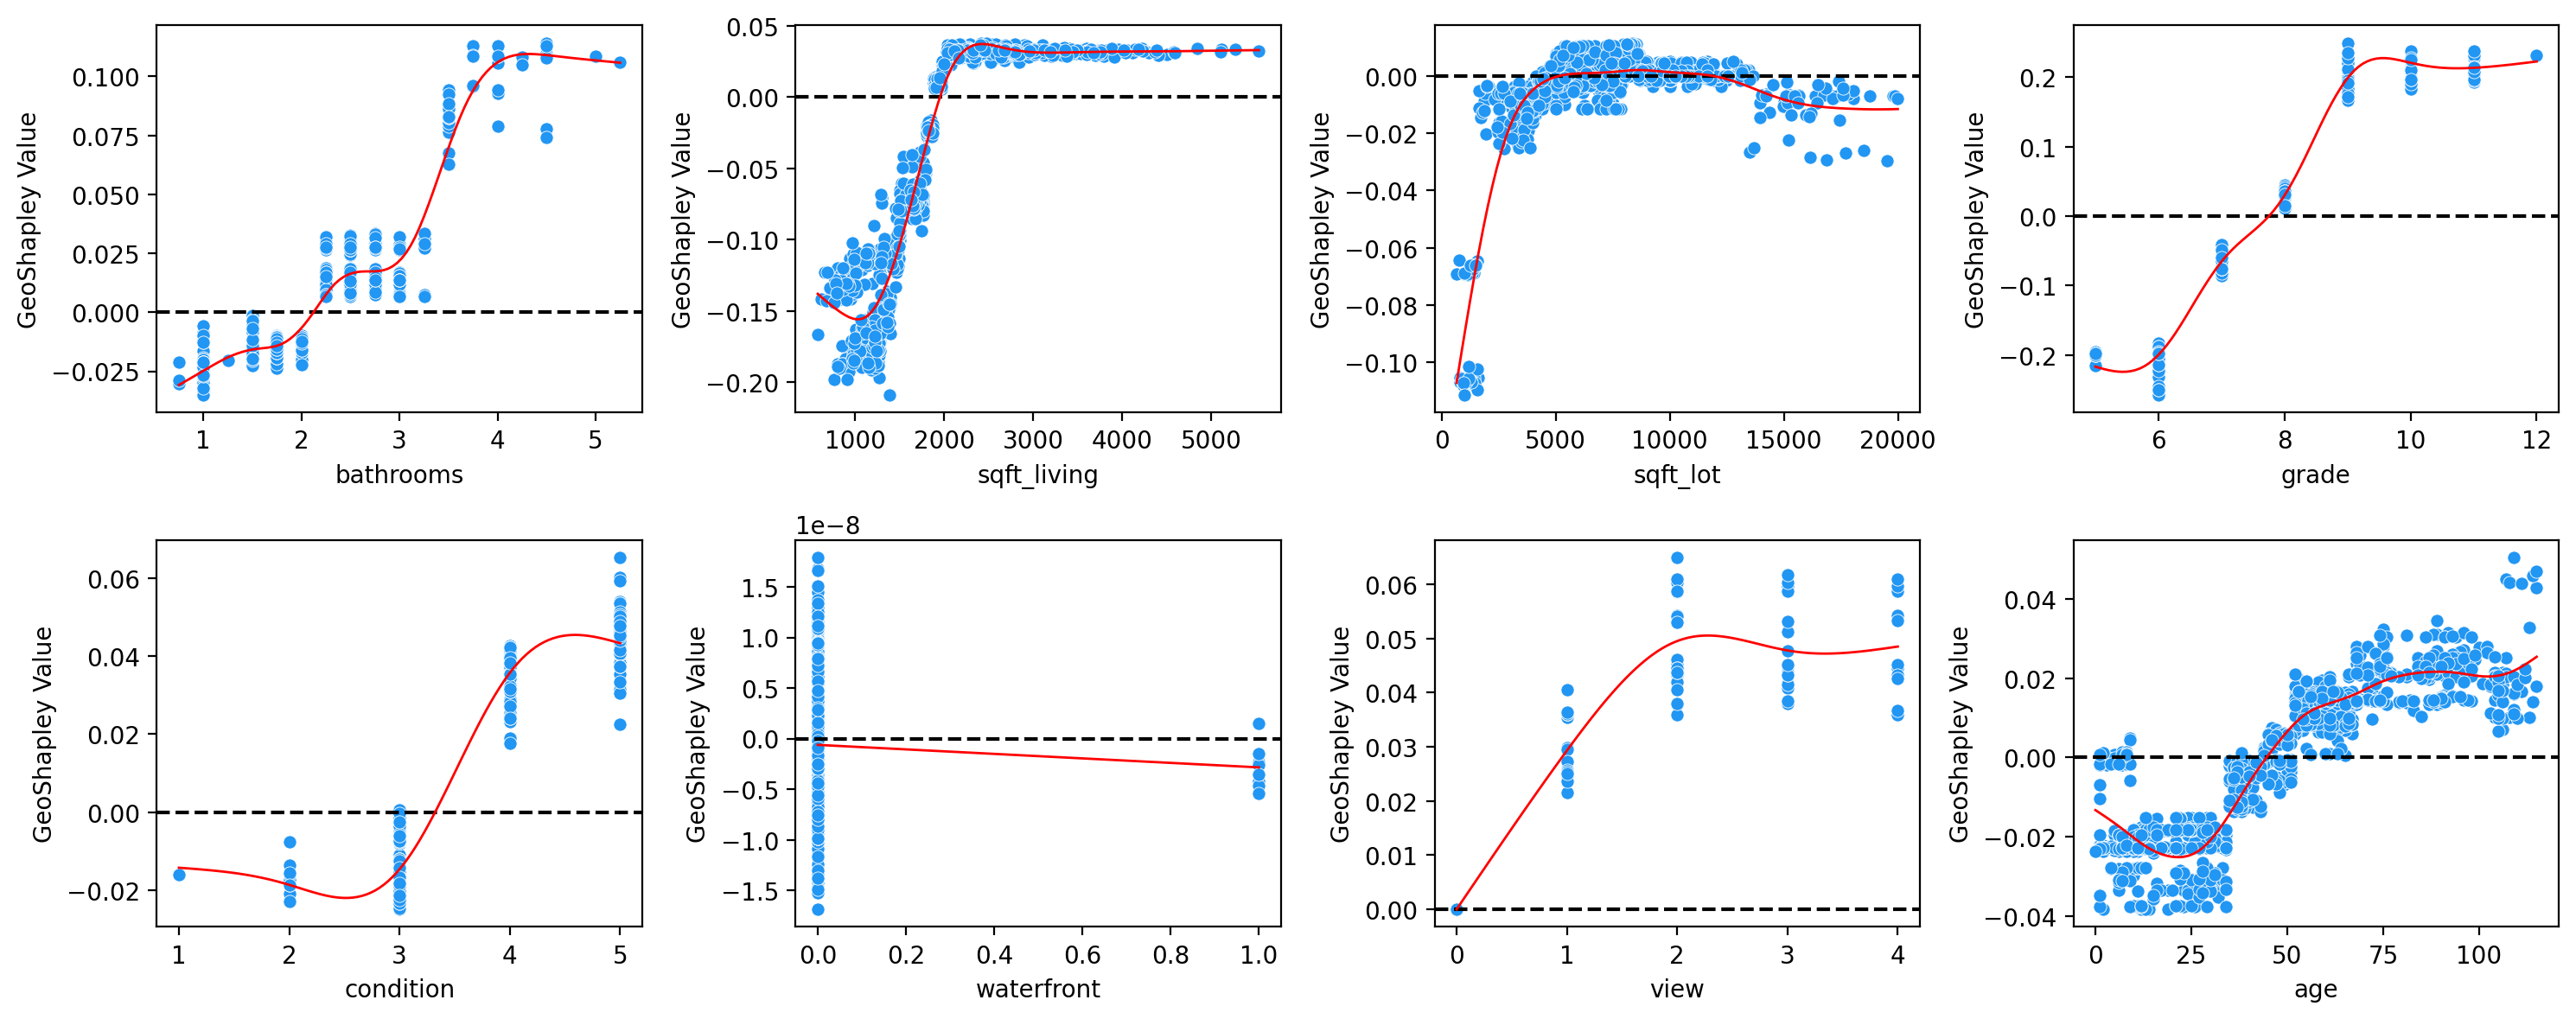

In [23]:
rslt.partial_dependence_plots(figsize=(15,6),max_cols=4,gam_curve=True,s=30)

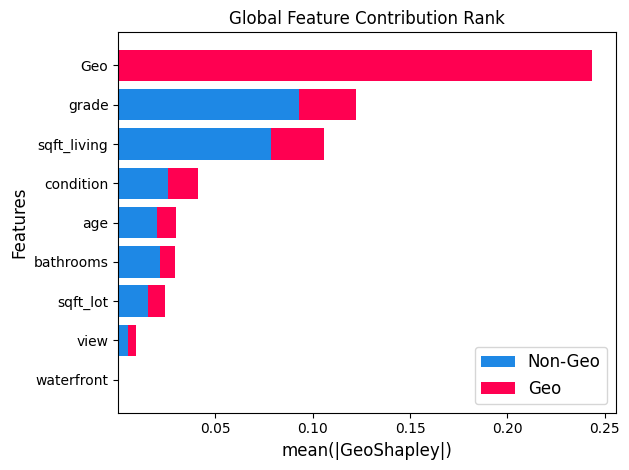

In [22]:
rslt.contribution_bar_plot(dpi=100)